<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Assignment: IBM HR Analytics Employee Attrition Modeling

*The comments/sections provided are your cues to perform the assignment. You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.*

*If at any point in time you need help on solving this assignment, view our demo video to understand the different steps of the code.*

**Happy coding!**

* * *

# IBM HR Analytics Employee Attrition Modeling.

__DESCRIPTION__

IBM is an American MNC operating in around 170 countries with major business vertical as computing, software, and hardware.
Attrition is a major risk to service-providing organizations where trained and experienced people are the assets of the company. The organization would like to identify the factors which influence the attrition of employees.

__Data Dictionary:__

    Age: Age of employee
    Attrition: Employee attrition status
    Department: Department of work
    DistanceFromHome
    Education: 1-Below College; 2- College; 3-Bachelor; 4-Master; 5-Doctor;
    EducationField
    EnvironmentSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
    JobSatisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
    MaritalStatus
    MonthlyIncome
    NumCompaniesWorked: Number of companies worked prior to IBM
    WorkLifeBalance: 1-Bad; 2-Good; 3-Better; 4-Best;
    YearsAtCompany: Current years of service in IBM

__Analysis Task:__
- Import attrition dataset and import libraries such as pandas, matplotlib.pyplot, numpy, and seaborn.
- Exploratory data analysis

    * Find the age distribution of employees in IBM
    * Explore attrition by age
    * Explore data for Left employees
    * Find out the distribution of employees by the education field
    * Give a bar chart for the number of married and unmarried employees

- Build up a logistic regression model to predict which employees are likely to attrite.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-dataset" data-toc-modified-id="Import-libraries-and-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and dataset</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Age-distribution-of-Employees" data-toc-modified-id="Age-distribution-of-Employees-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Age distribution of Employees</a></span></li><li><span><a href="#Explore-attrition-by-age" data-toc-modified-id="Explore-attrition-by-age-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Explore attrition by age</a></span></li><li><span><a href="#Explore-data-for-Left-employees" data-toc-modified-id="Explore-data-for-Left-employees-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Explore data for Left employees</a></span></li><li><span><a href="#Find-out-the-distribution-of-employees-by-the-education-field" data-toc-modified-id="Find-out-the-distribution-of-employees-by-the-education-field-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Find out the distribution of employees by the education field</a></span></li><li><span><a href="#Give-a-bar-chart-for-the-number-of-married-and-unmarried-employees" data-toc-modified-id="Give-a-bar-chart-for-the-number-of-married-and-unmarried-employees-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Give a bar chart for the number of married and unmarried employees</a></span></li></ul></li><li><span><a href="#Build-up-a-logistic-regression-model-to-predict-which-employees-are-likely-to-attrite" data-toc-modified-id="Build-up-a-logistic-regression-model-to-predict-which-employees-are-likely-to-attrite-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build up a logistic regression model to predict which employees are likely to attrite</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Train-and-Test-data" data-toc-modified-id="Train-and-Test-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train and Test data</a></span></li><li><span><a href="#Build-and-Evaluate-Model" data-toc-modified-id="Build-and-Evaluate-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Build and Evaluate Model</a></span></li></ul></li></ul></div>

## Import libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [2]:
dataframe=pd.read_csv("D:\\NIPUN_SC_REC\\3_Practice_Project\\Course_5_Data Science with Python\\Practice_projects\\Lesson 13.1_practice_Project\\IBM Attrition Data.csv")

## Exploratory data analysis

In [3]:
dataframe.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
names = dataframe.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 126.4+ KB


In [6]:
dataframe.shape

(1470, 13)

__The Attrition dataset has 1470 observations with 13 variables. Out of the 13 variables, there exists one target variable 'Attrition' with possible outcomes Yes and No. The other 12 variables are independent variables.__

### Age distribution of Employees

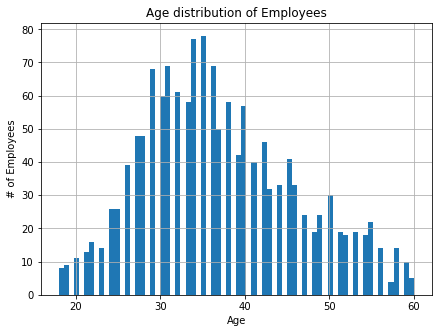

In [7]:
# histogram for age
plt.figure(figsize=(7,5))
dataframe['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

### Explore attrition by age

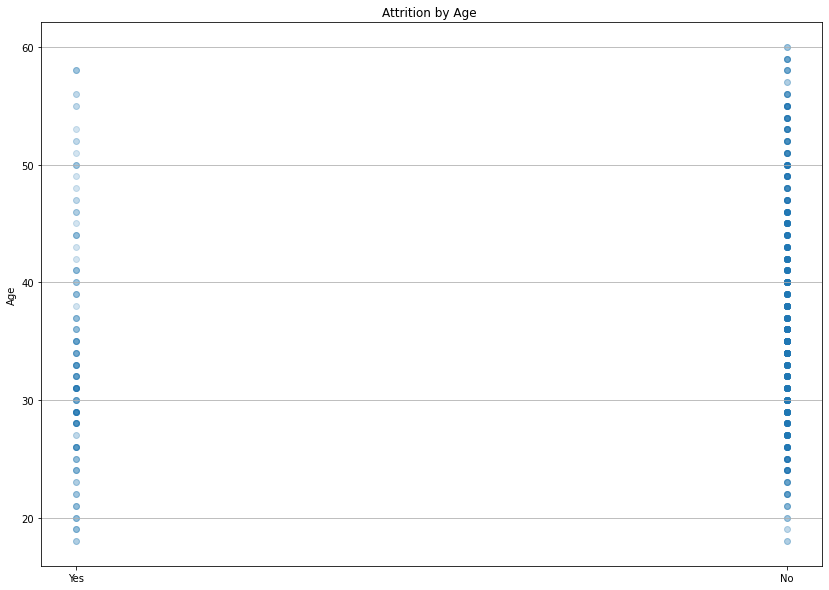

In [8]:
#Explore data for Attrition by Age
plt.figure(figsize=(14,10))
plt.scatter(dataframe.Attrition,dataframe.Age, alpha=0.1)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.grid(b=True, which='major',axis='y')
plt.show()

__The Scatter plot shows most of the attritions are centered around 30 year of age.__

### Explore data for Left employees

In [9]:
dataframe.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

__The dataset is well organised with no missing values. This is a Binary Classification Problem, so the Distribution of instances among the 2 classes is visualized below.__

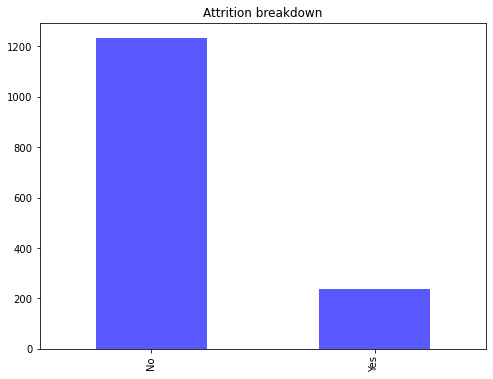

In [10]:
# explore data for Left employees breakdown
plt.figure(figsize=(8,6))
dataframe.Attrition.value_counts().plot(kind='bar',color='blue',alpha=.65)
plt.title("Attrition breakdown")
plt.show()

__The above plot shows the distribution of Attrition. Out of the total of 1470 observations 1233 is No, whereas 237 is Yes. We will treat this imbalance after splitting the data into Training and Test Set.__

### Find out the distribution of employees by the education field

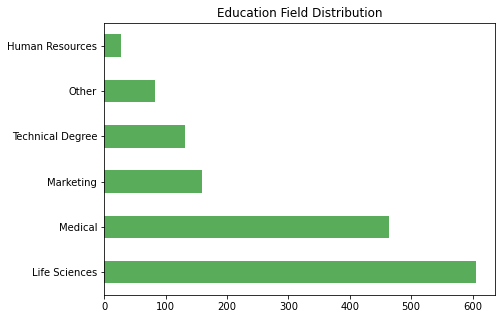

In [11]:
# explore data for Education Field distribution
plt.figure(figsize=(7,5))
dataframe.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

__Attrition by Education Field__

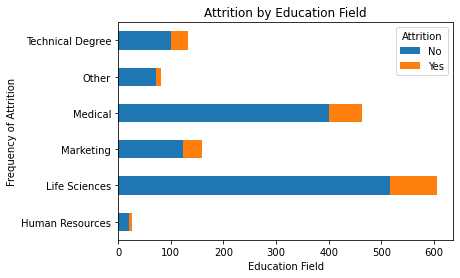

In [12]:
pd.crosstab(dataframe["EducationField"],dataframe["Attrition"]).plot(kind="barh",stacked=True)
plt.title("Attrition by Education Field")
plt.xlabel("Education Field")
plt.ylabel("Frequency of Attrition")
plt.show()

__LifeSciences and Medical fields have the highest number of employees and highest number of attrition rate. The percentage of employees who have attritioned against those who have been retained seems to be approximately same in all the education fields.__

### Give a bar chart for the number of married and unmarried employees

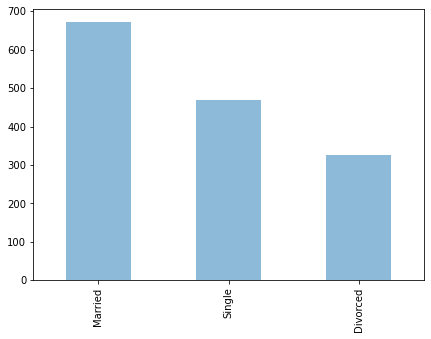

In [13]:
# explore data for Marital Status
plt.figure(figsize=(7,5))
dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.show()

__Attrition by Marital Status__

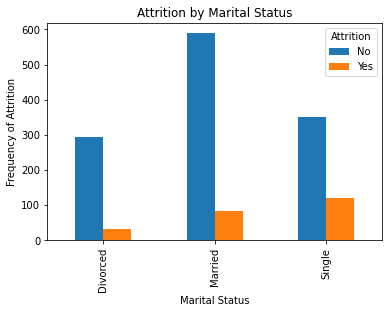

In [14]:
pd.crosstab(dataframe["MaritalStatus"],dataframe["Attrition"]).plot(kind="bar",stacked=False)
plt.title("Attrition by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Frequency of Attrition")
plt.show()

__The highest attrition is well correlated to ‘Single’ followed by ‘Married’ & ‘Divorced.__

## Build up a logistic regression model to predict which employees are likely to attrite

In [15]:
dataframe.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 126.4+ KB


In [17]:
dataframe.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [18]:
dataframe.std()

Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

In [19]:
dataframe['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [20]:
dataframe['Attrition'].dtypes

dtype('O')

### Data Preprocessing

In [21]:
dataframe['Attrition'].replace('Yes',1, inplace=True)
dataframe['Attrition'].replace('No',0, inplace=True)

In [22]:
dataframe.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [23]:
# building up a logistic regression model
X = dataframe.drop(['Attrition'],axis=1)
X.head()
Y = dataframe['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [24]:
dataframe['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [25]:
dataframe['EducationField'].replace('Life Sciences',1, inplace=True)
dataframe['EducationField'].replace('Medical',2, inplace=True)
dataframe['EducationField'].replace('Marketing', 3, inplace=True)
dataframe['EducationField'].replace('Other',4, inplace=True)
dataframe['EducationField'].replace('Technical Degree',5, inplace=True)
dataframe['EducationField'].replace('Human Resources', 6, inplace=True)

In [26]:
dataframe['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [27]:
dataframe['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [28]:
dataframe['Department'].replace('Research & Development',1, inplace=True)
dataframe['Department'].replace('Sales',2, inplace=True)
dataframe['Department'].replace('Human Resources', 3, inplace=True)

In [29]:
dataframe['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [30]:
dataframe['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [31]:
dataframe['MaritalStatus'].replace('Married',1, inplace=True)
dataframe['MaritalStatus'].replace('Single',2, inplace=True)
dataframe['MaritalStatus'].replace('Divorced',3, inplace=True)

In [32]:
dataframe['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [33]:
x=dataframe.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [34]:
x.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [35]:
y=dataframe['Attrition']

In [36]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [37]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  dataframe, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [38]:
y = np.ravel(y)

### Train and Test data

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

#Check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [40]:
y.mean()

0.16122448979591836

In [41]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [42]:
model2.score(X_train,y_train)

0.8415937803692906

__Training Accuracy of 84.15% is achieved by the model.__

In [43]:
model2.score(X_test,y_test)

0.8435374149659864

__Validation Accuracy of 84.35% is achieved by the model__

### Build and Evaluate Model

In [44]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [45]:
probs = model2.predict_proba(X_test)
print(probs)

[[0.86179622 0.13820378]
 [0.80754592 0.19245408]
 [0.74123931 0.25876069]
 [0.83441338 0.16558662]
 [0.73499935 0.26500065]
 [0.79097741 0.20902259]
 [0.85615196 0.14384804]
 [0.85699669 0.14300331]
 [0.96699058 0.03300942]
 [0.9368521  0.0631479 ]
 [0.95099278 0.04900722]
 [0.83101548 0.16898452]
 [0.86296556 0.13703444]
 [0.86581193 0.13418807]
 [0.88750604 0.11249396]
 [0.88892616 0.11107384]
 [0.88569727 0.11430273]
 [0.78516583 0.21483417]
 [0.7979449  0.2020551 ]
 [0.88511304 0.11488696]
 [0.70651589 0.29348411]
 [0.94676693 0.05323307]
 [0.86736254 0.13263746]
 [0.84276452 0.15723548]
 [0.60336837 0.39663163]
 [0.811292   0.188708  ]
 [0.91813731 0.08186269]
 [0.93285522 0.06714478]
 [0.68230751 0.31769249]
 [0.87027139 0.12972861]
 [0.87266386 0.12733614]
 [0.76968737 0.23031263]
 [0.86435774 0.13564226]
 [0.95758881 0.04241119]
 [0.84461487 0.15538513]
 [0.86719349 0.13280651]
 [0.90465982 0.09534018]
 [0.68936423 0.31063577]
 [0.90703618 0.09296382]
 [0.80663474 0.19336526]


In [46]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, predicted))

0.8435374149659864


In [47]:
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.6502502887947632


In [48]:
print(metrics.confusion_matrix(y_test, predicted))

[[371   0]
 [ 69   1]]


__Classification Report of the model__

In [49]:
print (metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [50]:
print (X_train)

      Intercept   Age  Department  DistanceFromHome  Education  \
338         1.0  30.0         2.0               5.0        3.0   
363         1.0  33.0         2.0               5.0        3.0   
759         1.0  45.0         3.0              24.0        4.0   
793         1.0  28.0         1.0              15.0        2.0   
581         1.0  30.0         1.0               1.0        3.0   
...         ...   ...         ...               ...        ...   
763         1.0  34.0         2.0              10.0        4.0   
835         1.0  35.0         3.0               8.0        4.0   
1216        1.0  43.0         2.0               2.0        3.0   
559         1.0  38.0         1.0               2.0        5.0   
684         1.0  40.0         2.0              10.0        4.0   

      EducationField  YearsAtCompany  
338              3.0            10.0  
363              3.0             1.0  
759              2.0             6.0  
793              1.0             4.0  
581         

In [51]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[6.25571917e-07 9.99999374e-01]]


__According to the Performance Analysis, it can be concluded that the Machine Learning Predictive Model has been successful in effectively classifying 84.35% unknown (Validation Set) examples correctly and has shown quite descent statistical figures for different performance metrics.__